# Week 2: Python Basics (Part 2)


- Compound Data Types
- Mutability, Variables & References
- Functions
- Input/Output (I/O)

## Iteration

Last week we ended on `for` loops.

```
for var_name in iterable:
    statement # presumably using var_name
```

What is an **iterable**?  Why not just say **sequence**?

### More Iterables

#### range

Another iterable!

`range(stop)` # goes from 0 to (stop-1)

`range(start, stop)` # goes from start to (stop-1)

Same rules as slice, always **inclusive** of start, **exclusive** of stop.

*or as you'd write mathematically:* ```[start, stop)``` -- we've seen this before with slicing

In [25]:
for x in range(12):
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11


In [79]:
for x in range(8, 12):
    print(x)

8
9
10
11


In [26]:
type(range(12)) # hmm

range

#### `enumerate`

Another function that returns an iterable, for when we need the index along with the object.

`enumerate(original_iterable)` yields two element tuples: `(index, element)` for every item in the original.

In [27]:
# find using range/len - as you might think to write it based on past experience
def find_r(s, letter_to_find):
    for i in range(len(s)):
        if s[i] == letter_to_find:
            return i
    return -1

In [72]:
# find using enumerate - better
def find_e(s, letter_to_find):
    for i, letter in enumerate(s):  # tuple unpacking
        if letter == letter_to_find:
            return i
    return -1

In [29]:
find_e("Hello world", "w")

6

In [30]:
find_r("Hello world", "?")

-1

In [31]:
s = "Hello world"
s.find("w")  # built-ins are best

6

Note: For HW#0 it is OK to use range for iteration, for future HWs if you are using the index & value, `enumerate` is the Pythonic way to do this.

### aside: sequence unpacking

When you know exactly how many elements are in a sequence, you can use this syntax to "unpack" them into variables:

In [78]:
tup = (1, 2, 3)
lst = ["a", "b", "c"]

x, y, z = tup # works with lst too
print(x, y, z)

1 2 3


## `dict`

A collection of key-value pairs.  (aka map/hashmap in other languages)

- Keys must be hashable.  `tuple`, `str`, scalars -- why?
- Values are references, can be any type.
- Dynamically resizable
- Implemented using a hashtable, lookup is constant-time.  **O(1)**

- Iterable? Yes
- Mutable? Yes
- Sequence? No. (Why not?)

In [32]:
# declaration
record1 = {"name": "Anna",
           "age": 42}

empty = {}

# alternate form
record2 = dict(name="Anna", age=42)

# can also construct from sequence of tuples

record3 = dict([("name", "Anna"), ("age", 42)])

# can compare for equality
record1 == record2 == record3

True

In [33]:
# indexing by key
print(record1["name"])

Anna


In [34]:
# 'in' tests if a key exists (not a value!)
print(record1)
print("name" in record1)
print(42 in record1)

{'name': 'Anna', 'age': 42}
True
False


In [80]:
# keys, values, items
print(record1.keys())
print(list(record1.values()))
#print((record1.items()))

dict_keys(['name', 'age'])
['Anna', 42]


In [36]:
## hashable?

print(f"{hash('abc')=}")
print(f"{hash(1234.3)=}")
print(f"{hash((1,2,3))=}")

print(f"{hash([1,2,3,4])=}")

hash('abc')=-110906196332550819
hash(1234.3)=691752902764004562
hash((1,2,3))=529344067295497451


TypeError: unhashable type: 'list'

In [39]:
d2 = {}
d2[[1,2,3]] = "OK" 

TypeError: unhashable type: 'list'

In [40]:
hash("Python")

-3505460471837396463

### Mutability

Dictionaries are *mutable*, you can change, expand, and shrink them in place.

This means we aren't copying/creating new dictionaries on every edit.

In [41]:
order = {"spam": 1, "eggs": 2, "coffee": 1}

order["spam"] = 5
print(order)

{'spam': 5, 'eggs': 2, 'coffee': 1}


In [42]:
del order["eggs"]
print(order)

{'spam': 5, 'coffee': 1}


In [43]:
order["bagel"] = 1
print(order)

{'spam': 5, 'coffee': 1, 'bagel': 1}


In [44]:
hash("bagel"), hash("Bagel")

(2823432265586760681, -7141661179128728551)

In [45]:
## dictionaries are iterable

for key in order:
    print(key)

spam
coffee
bagel


In [46]:
# can use .items() or .values() to loop over non-keys
for key, value in order.items():
    print(f"{key=} {value=}")
    
    
print(order.items())

key='spam' value=5
key='coffee' value=1
key='bagel' value=1
dict_items([('spam', 5), ('coffee', 1), ('bagel', 1)])


In [47]:
# can use .items() or .values() to loop over non-keys
for a_tuple in order.items():
    print(a_tuple[0], a_tuple[1])

spam 5
coffee 1
bagel 1


### common dictionary methods

| Operation | Meaning |
|-----------|---------|
| `d.keys()` | View of all keys. |
| `d.values()` | View of all values. |
| `d.items()` | View of key, value tuples. |
| `d.copy()` | Make a (shallow) copy. |
| `d.clear()` | Remove all items. |
| `d.get(key, default=None)` | Same as d[key] except if item isn't present, default will be returned. |
| `d.pop(key, default=None)` | Fetch item & remove it from dict. |
| `len(d)` | Number of stored entries. |

See all at https://docs.python.org/3/library/stdtypes.html#dict

In [48]:
order

number_ordered = order.pop("spam", 0)
print(number_ordered)

5


In [49]:
print(order)

{'coffee': 1, 'bagel': 1}


### Dictionary View Objects

As noted above, `keys(), values() and items()` return "view objects."

The returned object is a dynamic view, so when the dictionary changes, the view changes.

In [50]:
dishes = {'eggs':2,'sausage':1,'bacon':1,'spam':500}

# Keys is a view object of the keys from the dishes dictionary
keys = list(dishes.keys()) 
values = list(dishes.values())
items  = list(dishes.items()) 

print(keys)
print(values)
print(items)

['eggs', 'sausage', 'bacon', 'spam']
[2, 1, 1, 500]
[('eggs', 2), ('sausage', 1), ('bacon', 1), ('spam', 500)]


In [51]:
# View objects are dynamic and reflect dictionary changes 

# Lets delete the 'eggs' entry 
del dishes['eggs']

# Notice the both the views have removed key and its value 
print(keys)
print(values)
print(items)

['eggs', 'sausage', 'bacon', 'spam']
[2, 1, 1, 500]
[('eggs', 2), ('sausage', 1), ('bacon', 1), ('spam', 500)]


In [52]:
# Nested Dictionaries Example

menu = {
    "Breakfast": {"Eggs": 2.19, "Toast": 0.99, "Orange Juice": 1.99},
    "Lunch": {"BLT": 3.99, "Chicken": 5.99, "Salad": 4.50},
    "Dinner": {"Cheeseburger": 9.99, "Salad": 7.50, "Special": 8.49}
}

print(menu["Lunch"])

print(menu["Lunch"]["Salad"])

{'BLT': 3.99, 'Chicken': 5.99, 'Salad': 4.5}
4.5


### Caveats

- Downsides of mutables?
- Modifying a `dict` while iterating through it.

In [53]:
# iteration example
d = {"A": 1, "B": 2, "C": 3}
to_remove = []
for key, value in d.items():
    if value == 2:
        to_remove.append(key)
for key in to_remove:
    d.pop(key)
    
print(d)

{'A': 1, 'C': 3}


In [81]:
students = {
    "Anne": 98,
    "Mitch": 13,
    "Zach": 65,
}

below_60 = []

for student in students:
    grade = students[student]
    if grade < 60:
        below_60.append(student)

below_60
for name in below_60:
    students.pop(name)
    
print(students)

{'Anne': 98, 'Zach': 65}


## `set`

Sets contain an unordered collection of *unique* & *immutable* values.

  - Unique: no duplicates

  - Immutable: values cannot be `dict`, `set`, `list`.


Sets themselves are *mutable*.

In [55]:
# defining a set
animals = {"llama", "panda", "ostrich"}
print(animals)

# or can be made from an iterable
animals = set(["llama", "panda", "ostrich"])
print(animals)

{'ostrich', 'llama', 'panda'}
{'ostrich', 'panda', 'llama'}


In [56]:
# no duplicates
animals = set(["llama", "panda", "ostrich", "ostrich", "panda"])
print(animals)

{'ostrich', 'panda', 'llama'}



### Set Theory Operations

Sets are fundamentally mathematical in nature and contain operations based on set theory. They allow the following operations:

 - Union (`union()` or `|`}: A set containing all elements that are in both sets

 - Difference (`difference()` or `-`): A set that consists of elements that are in one set but not the other.

 - Intersection (`intersection` or `&`): A set that consists of all elements that are in both sets.



In [57]:
#The following creates a set of single strings 'a','b','c','d','e'
# and another set of single strings 'b','d','x','y','z'
A = set('abcde')
B = set(["b", "d", "x", "y", "z"])

print("A = ", A)
print()
print("B = ", B)

A =  {'c', 'a', 'e', 'b', 'd'}

B =  {'y', 'z', 'x', 'b', 'd'}


In [58]:
# Union Operation 
new_set = A | B 
print(new_set)
print('---')
new_set = A.union(B) # Same operation as above but using method 
print(new_set)

{'y', 'z', 'c', 'a', 'x', 'e', 'b', 'd'}
---
{'y', 'z', 'c', 'a', 'x', 'e', 'b', 'd'}


In [59]:
# Difference Operation 
new_set = A - B 
print(new_set)
print("---")
new_set = B.difference(A)  # note that order matters for difference
print(new_set)

{'a', 'e', 'c'}
---
{'y', 'x', 'z'}


In [60]:
# Intersection Operation 
new_set = A & B 
print(new_set)
print('---')
new_set = A.intersection(B) # same operation as above but using method 
print(new_set)

{'b', 'd'}
---
{'b', 'd'}


In [61]:
# Symmetric Difference Operation 
new_set = A ^ B 
print(new_set)
print('---')
new_set = A.symmetric_difference(B) # same operation as above but using method 
print(new_set)

{'y', 'z', 'c', 'a', 'x', 'e'}
---
{'y', 'z', 'c', 'a', 'x', 'e'}


### Other Set Methods

| Method | Purpose | 
|--------|---------|
| `s.add(item)` | Adds an item to set. |
| `s.update(iterable)` | Adds all items from iterable to the set. |
| `s.remove(item)` | Remove an item from set. |
| `s.discard(item)` | Remove an item from set if it is present, fail silently if not. |
| `s.pop()` | Remove an arbitrary item from the set. |
| `s.clear()` | Remove all items from the set. |

In [62]:
s = set()  # why not {}?

s.update(["A", "2", "3", "4", "5", "6", "7", "8", "9", "J", "Q", "K"])

s.remove("A")
print("Removed Ace")
print(s)

Removed Ace
{'5', 'K', '2', '9', '7', '4', 'J', '6', 'Q', '8', '3'}


In [63]:
s.discard("9")
#print("Discarded Ace")
print(s)

{'5', 'K', '2', '7', '4', 'J', '6', 'Q', '8', '3'}


In [64]:
card = s.pop()
print("Popped", card)
print(s)

Popped 5
{'K', '2', '7', '4', 'J', '6', 'Q', '8', '3'}


In [65]:
print("---")
s.add("Joker")
print(s)



"Honda Civic" in ["Honda Civic", "Ford Focus", "Honda Civic", "Honda Civic", "Honda Civic", "Honda Civic", "Honda Civic", "Escalade"]

---
{'K', 'Joker', '2', '7', '4', 'J', '6', 'Q', '8', '3'}


True

In [66]:
d1 = {"eggs": 2, "pancakes": 100, "juice": 1}
d2 = {"eggs": 3, "waffles": 1, "coffee": 1}
d3 = {"eggs": 1, "fruit salad": 1}

print("Both ordered:", set(d1) & set(d2) & set(d3))
print("Only ordered by #1:", set(d1) - set(d2))

Both ordered: {'eggs'}
Only ordered by #1: {'juice', 'pancakes'}


In [67]:
set(d1.items())

{('eggs', 2), ('juice', 1), ('pancakes', 100)}

In [68]:
s = {"one", "two", "three", "four"}
for x in s:
    print(x)

one
two
four
three


In [69]:

students = [
    {"name": "adam", "num": 123},
    {"name": "quynh", "num": 456},
    {"name": "quynh", "num": 456},
]

s = set()
for student in students:
    s.add(tuple(student.items()))
s

{(('name', 'adam'), ('num', 123)), (('name', 'quynh'), ('num', 456))}

## Discussion

#### Are sets sequences?

#### Why do set members need to be immutable?

#### How can we store compound values in sets?

#### Why do dictionary keys have the same restrictions?

In [71]:
# frozenset demo
nums = [1, 2, 3]
frozen_nums = frozenset(nums)
print(frozen_nums)

nested = {frozen_nums, frozenset("ABC")}

print(nested)

frozen_nums.add(4)

frozenset({1, 2, 3})
{frozenset({1, 2, 3}), frozenset({'B', 'A', 'C'})}


AttributeError: 'frozenset' object has no attribute 'add'

## Mutability

Mutable values can be changed in place.

We've seen that `list` was mutable, and `dict` and `set` as well now.

#### Mutable
 - `list`
 - `dict`
 - `set`
 
#### Immutable
 - `str`
 - `tuple`
 - `frozenset`
 - scalars: `int`, `float`, `complex`, `bool`, `None`

In [ ]:
# list
d = [1, 2, 3]
d.append(4)
print(d)

In [ ]:
# str
s = "Hello"
s += " World"
s 

# how did s change?

## Python Objects & References

Everything in Python is an `object`.  An object is a piece of memory with values & associated operations.

We've seen plenty of methods on `str`, `list`, `dict`, etc. 

`a_string.lower()`, `dict.pop(val)`, etc.

As we'll see in time, every type in Python works this way. 

Operators like `+`, `-`, `and` and `or` are "associated operations" when we're using scalars like `int` or `bool`.

Variables in python are referred to as *names* or *identifiers*.

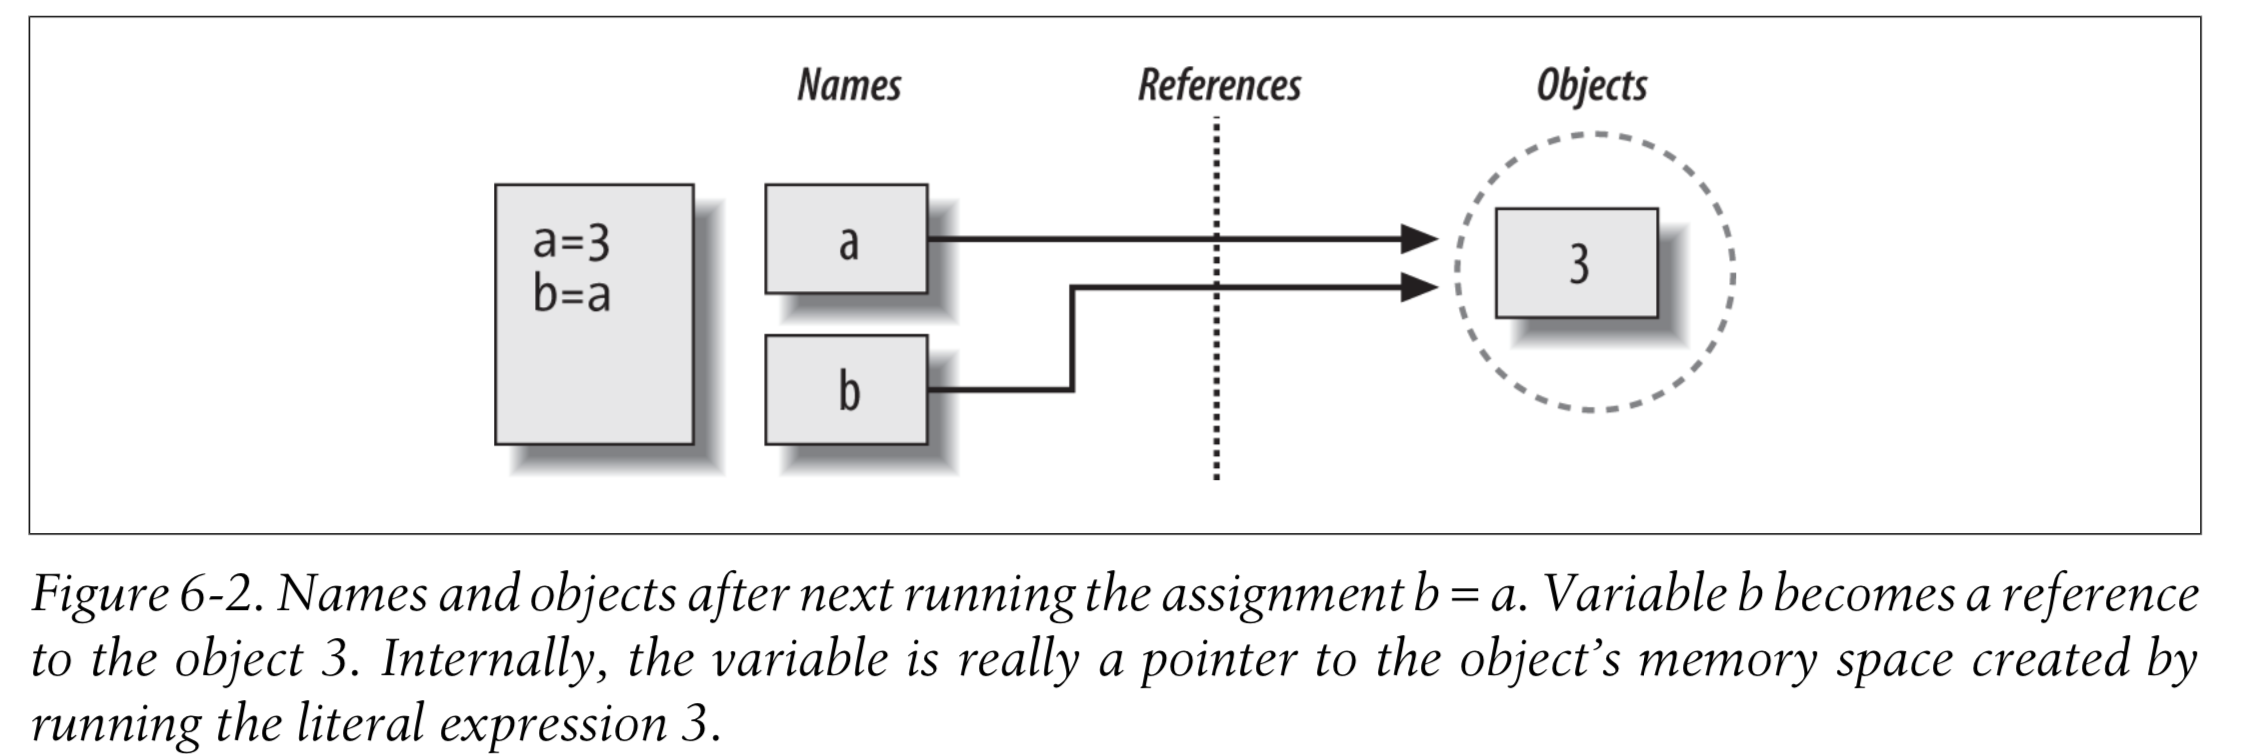

 -- Learning Python 2013
 
A name does not uniquely identify an object!

#### objects are typed, not variables

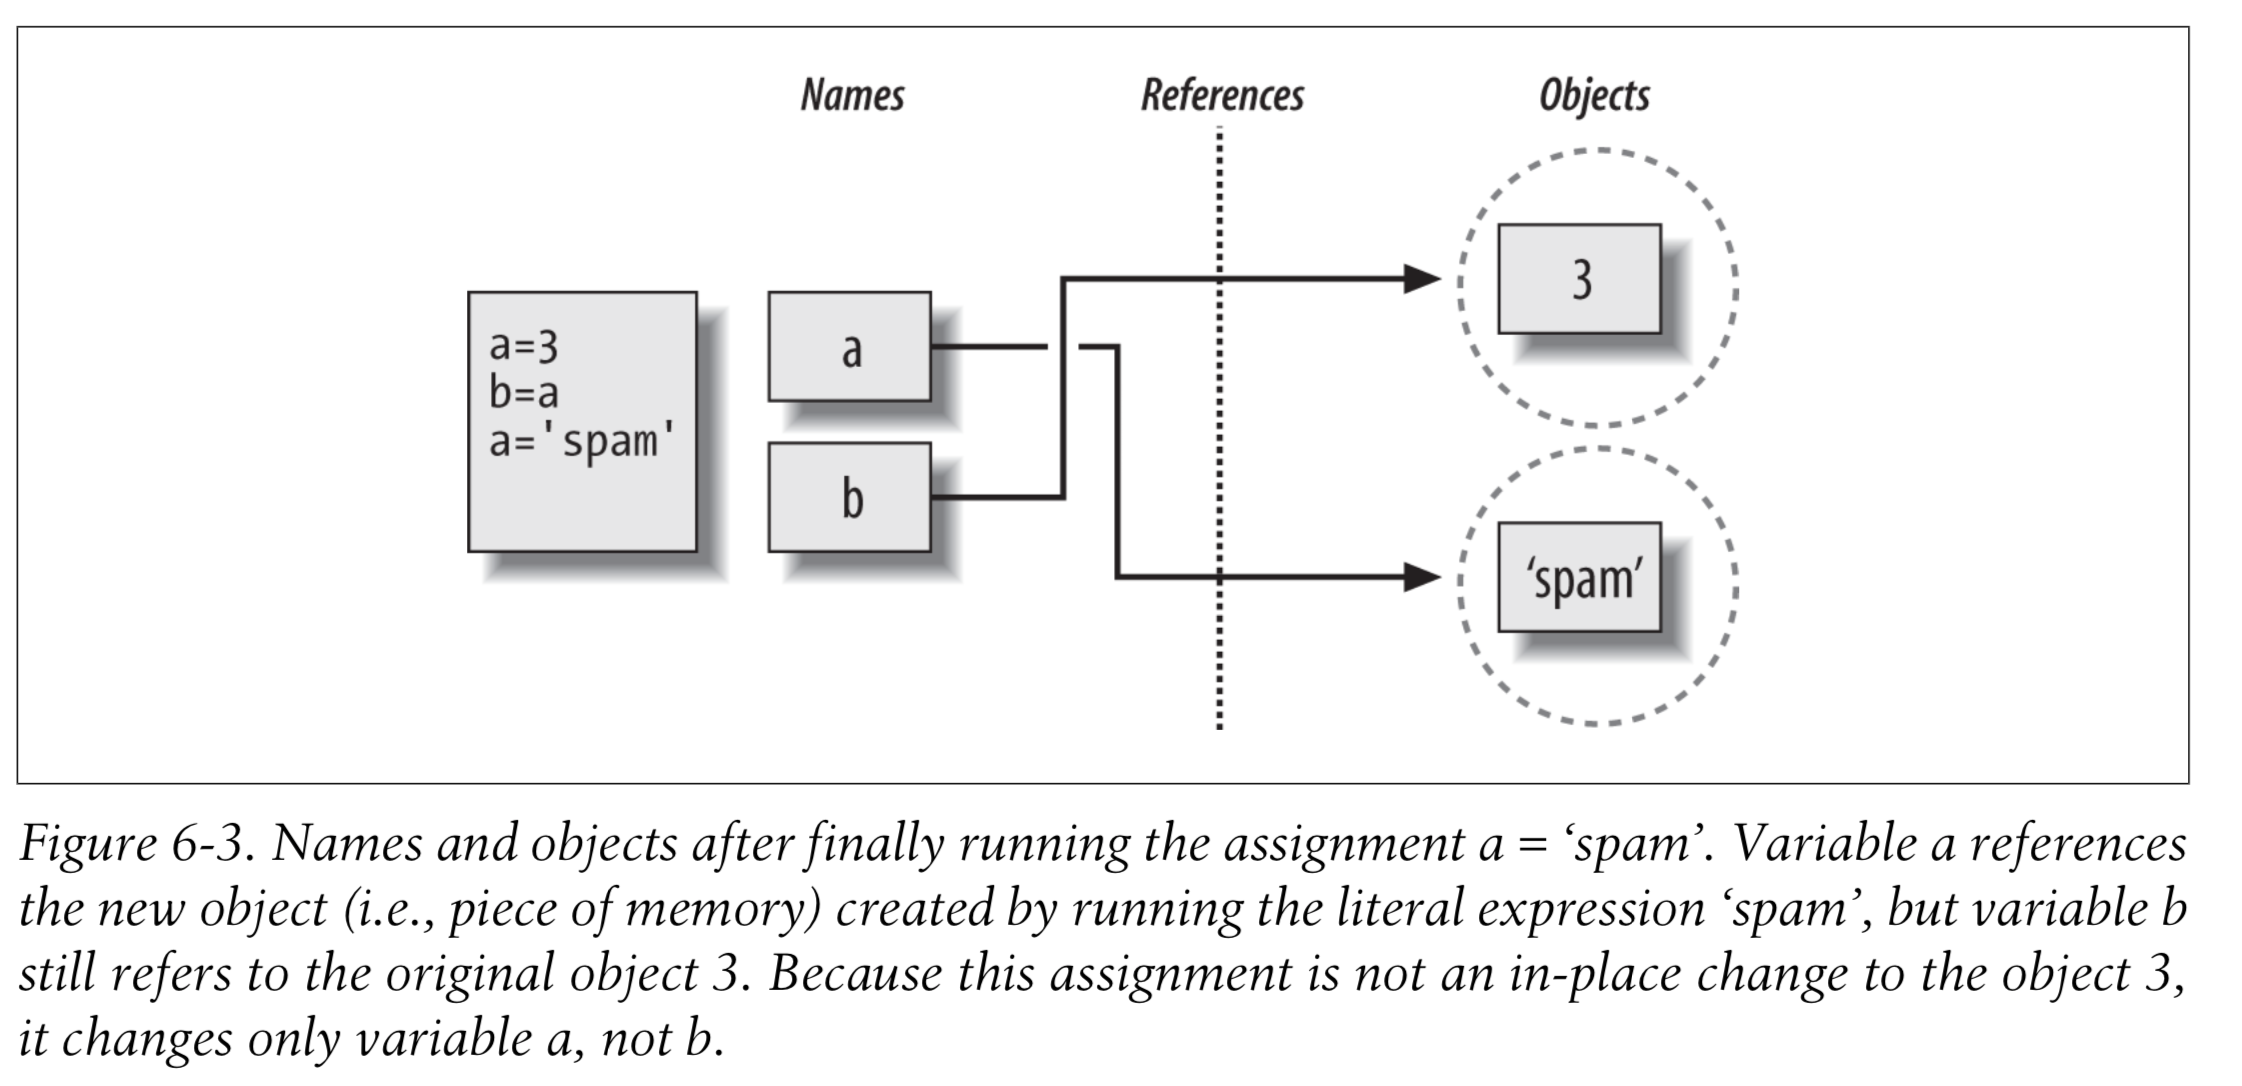
 -- Learning Python 2013

### Shared references

Setting a variable to a new value does not alter the original.

It causes the variable to reference a brand new object.

In [ ]:
x = 10
y = x
x = 20
print(x, y)

In [ ]:
# what does this mean for mutable objects?
x = [1, 2, 3]
y = x
x.append(4)
print(x)
print(y)

In [ ]:
a = 3
b = a
a *= 2
print(a, b)

#### Identity

The built-in `id(...)` function returns the identity of an object, which is an integer value guaranteed to be unique and constant for lifetime of object

In the CPython Interpeter (the one we are using in this class), it is the address of the memory location storing the object.

In [ ]:
x = "MPCS"
print(id(x)) # Unique integer-value for the object pointed by x

In [ ]:
fruit1 = ('Apples', 4)
fruit2 = ('Apples', 4)
fruit3 = fruit2
#print(f'Fruit1 id = {id(fruit1)} \n Fruit2 id = {id(fruit2)}')

print(id(fruit3), id(fruit2))

#### Equality vs. Identity

Two different ways of testing if objects are the "same":

- Equality operator (`==`): Returns true if two objects are equal (i.e., have the same value)
- Identity operator (`is`): Returns true if two objects identities are the same.

`a is b` means `id(a) == id(b)`

In [ ]:
a = [1, 2, 3]
b = [1, 2, 3]
print("a == b", a == b)

print(id(a))
print(id(b))
print("a is b", a is b) # The id values are different 

#### `is None`

If you ever need to check if a value is `None`, you'd use `is None` or `is not None`

### list / string example revisited

In [ ]:
# list d
d = [1, 2, 3]
print(id(d))
d.append(4)
print(d)
print(id(d))

In [ ]:
# str D
s = "Hello"
print(id(s))
s += " World"
print(s)

# did s change?
print(id(s))

### Object Creation

    Each time you generate a new value in your script by running an expression, Python creates a new object (i.e., a chunk of memory) to represent that value.
    
-- Learning Python 2013

Not quite! CPython does not guarantee this, and in fact sometimes caches & reuses immutable objects for efficiency.



In [ ]:
a = 1000 
b = 1000 

# Two different objects, two different ids.
print(a is b)  

a = 100
b = 100

# However, for small integer objects, CPython caches them 
# this means that a and b point to the same object 
print(a is b)

for i in range(10):
    print(i, i is i)

In [ ]:
# CPython does the same for short strings 
str1 = 'MPCS' * 10
str2 = 'MPCS' * 10
print(id(str1), id(str2))
str1 is str2 

### Copying

If `y = x` does not make a copy, how can we get one?

We've seen the `.copy()` method on a few of our types.  Which ones?

We can also use the `copy` module:

In [ ]:
x = [1, 2, 3]
y = x.copy()

print(id(x))
print(id(y))

x.append(4)
print(x, y)

In [ ]:
# shallow copy example 

x = [[1, 2], [3, 4]]
y = x.copy()  # or copy.copy(x)
#print("x is y", x is y)
#print("x[0] is y[0]", x[0] is y[0]) 

#print(x, y)
x[0].append(5)
print(x, "\n", y)


In [ ]:
# deep copy
import copy
z = copy.deepcopy(x)
print("x[0] is z[0]", x[0] is z[0])

### Garbage Collection

Python is a garbage collected language.  

We don't free our own memory, Python does instead.

Behind the scenes, Python stores a reference counter on each `object`.  How many names/objects reference the object.

When reference count drops to zero, Python can reclaim the memory.

## Functions

A function is a set of statements that can be called more than once.

Benefits of functions:

- Encapsulation: package logic for use in multiple places
- Allows programmer to avoid copy/paste to repeat same task, which helps maximize code reuse and minimize redundancy
- Procedural decomposition: split our program into subtasks (i.e., functions) with separate roles.
- Make life easier for debugging, testing, doing maintenance on code


```python
def function_name(arg1, arg2, arg3):
    """
         Description of function task 

         Inputs: 
             arg1(type): description of arg1 
             arg2: description of arg2
             arg3: description of arg2

         Outputs:
             Description of what this function returns 
    """
    statement1
    statement2
    statement3
    return value  # optional
```

### return

- `return` may appear anywhere in a function body, including multiple times.

- The first `return` encountered exits the function.

- Every function in python returns a value. 

- If no `return` statement is present, `None` is implicitly returned.

In [ ]:
def is_even(num):
    return num % 2 == 0


print(is_even(3))

###  `pass` statement

Can be used whenever you need to leave a block empty.  Usually temporarily.

```python

if x < 0:
    pass # TODO: figure this out later


def func():
    pass
```

**What does func return?**

### docstrings

Functions should provide docstrings, which are strings declared as the first statement within the function body.

Almost always use triple-quotes to allow multi-line formatting.

The style guide & assignments show examples of the format we expect.

# I/O

## `print()`

`print(*objects, sep=' ', end='\n', file=sys.stdout, flush=False)`

https://docs.python.org/3/library/functions.html#print

In [ ]:
print("Can", "pass", "multiple", {"objects": True})
print("Hello", "World", sep="~~~~", end="!")
print("Same line")

### `input()`

In [ ]:
name = input("What is your name: ")
print(f"Hello {name}")

# always a string
year = input("What year is it: ")
print(year, type(year))

## Files

Another built in type in Python.

Requires us to understand a bit more about how files & memory work.

### Typical workflow:

- Read contents of file(s) from disk into working memory.
- Parse and/or manipulate data as needed.
- (Optional) Write data back to disk with modifications.

### Other Workflows

- Append-only (e.g. logging)
- Streaming data (needed for large files where we can't fit into memory)

### Text vs. Binary

We're opening our files in the default, text mode. It is also possible to open files in a binary mode where it isn't assumed we're reading strings.

### Reading From a File

**emails.txt**

```
borja@cs.uchicago.edu
jturk@uchicago.edu
lamonts@uchicago.edu
```

In [ ]:
# to access a file's contents, we need to open it
fd = open("emails.txt")

print(fd)

In [ ]:
# fd is a `file` object, we can use methods to read from the file
emails = fd.read()
print(type(emails))

In [ ]:
# read() got all the data at once, split with \n newlines

# We can also iterate over the lines in the file

fd.readlines()

Open files have a 'cursor', we've reached the end of the file (EOF) so there isn't more to read.

In [ ]:
# if we use 'seek' we can rewind to the beginning of the file
fd.seek(0)
fd.readlines()

In [ ]:
# we can also iterate over the file
f = open("emails.txt")
for email in f.readlines():
    print(email.strip())   # extra newline?

### Writing to a File

We need to open the file with write or append permissions.

In [ ]:
!rm names.txt

f = open("names.txt", "w")
f.write("Bob\nPhil\n")
f.write("Sally\n")
f.write("Rebecca\n")
f.write("Joan\n")
f.close()

!cat names.txt

In [ ]:
f = open("names.txt", "a")
f.write("Hector\n")
f.flush()
!cat names.txt

**Important:** Opening in write mode clears the contents of the file.

"r" : Read (default)

"w" : Write

"a" : Append

#### `close`

Very important to close a file.

- Frees resources.
- Allows other programs to access file contents.
- Ensures edits are written to disk.

### `with`

The file object is a "context manager", we'll cover those in more detail in a few weeks.

The `with` statement allows us to safely use files without fear of leaving them open.

```python

with open(filename) as variable:
    statement1
    statement2
```

No matter what happens inside `with` block, the file will be closed.

In [ ]:
f = open("names.txt", "w")
f.write("Bob\n")
f.write("Phil\n")
1 / 0

In [ ]:
!cat names.txt

In [ ]:
# Full Example

# load data into our chosen data structure
emails = []
with open("emails.txt") as f:
    for email in f:
        emails.append(email)                
print(emails)

In [ ]:
# transform data
cnet_ids = []
for email in emails:
    cnet_id, domain = email.split("@")
    cnet_ids.append(cnet_id)
print(cnet_ids)

In [ ]:
# write new data
with open("cnetids.txt", "w") as f:
    for cnet_id in cnet_ids:
        # print() adds newlines by default
        print(cnet_id, file=f)    
        # or
        #f.write(cnet_id + "\n")
        
!cat cnetids.txt

#### Useful `file` Methods

| Operation | Purpose |
|-----------|---------|
| `f.read()` | Read entire file & return contents. |
| `f.read(N)` | Read N characters (or bytes). |
| `f.readline()` | Read up to (and including) next newline. |
| `f.readlines() ` | Read entire file split into list of lines. |
| `f.write(aStr)` | Write string `aStr` into file. |
| `f.writelines(lines)` | Write list of strings into file. |
| `f.close()` | Close file, prefer `with open()` instead. |
| `f.flush()` | Manually flush output to disk without closing. |
| `f.seek(N)` | Move cursor to position N. |

-- Table based on Learning Python 2013

### Common Gotchas

- Relative paths - use `pathlib` https://docs.python.org/3/library/pathlib.html
- File permissions
- Mind file mode (read/write/append)